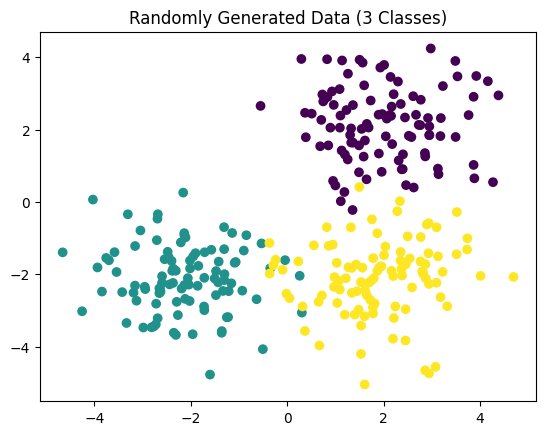

Epoch 0, Error: 0.24921
Epoch 2000, Error: 0.01080
Epoch 4000, Error: 0.00998
Epoch 6000, Error: 0.00957
Epoch 8000, Error: 0.00930


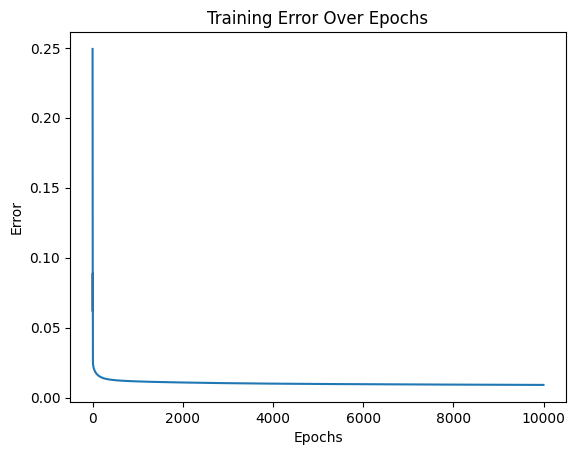

Test Accuracy: 93.33%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(0)

class1 = np.random.randn(100, 2) + np.array([2, 2])
class2 = np.random.randn(100, 2) + np.array([-2, -2])
class3 = np.random.randn(100, 2) + np.array([2, -2])

X = np.vstack((class1, class2, class3))
Y = np.array([0] * 100 + [1] * 100 + [2] * 100)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis")
plt.title("Randomly Generated Data (3 Classes)")
plt.show()

encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(Y.reshape(-1, 1))

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.learning_rate = learning_rate
        self.W_HI = np.random.randn(input_neurons, hidden_neurons)
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        self.prediction = self.sigmoid(self.output_input)
        return self.prediction

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_OH += self.hidden_output.T.dot(output_delta)
        self.W_HI += X.T.dot(hidden_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

NN = NeuralNetwork(input_neurons=2, hidden_neurons=10, output_neurons=3, learning_rate=0.2)

errors = []
for epoch in range(10000):
    NN.train(X_train, Y_train)
    train_error = np.mean(np.square(Y_train - NN.feedForward(X_train)))
    errors.append(train_error)

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Error: {train_error:.5f}")

plt.plot(errors)
plt.title("Training Error Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

predictions = NN.feedForward(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

accuracy = np.mean(predicted_classes == true_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
